In [56]:
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt
from termcolor import colored
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data = pandas.read_csv('../Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data.describe().round(2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [7]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: >

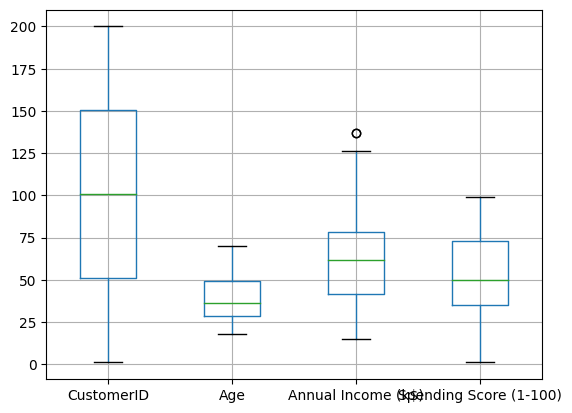

In [8]:
data.boxplot()

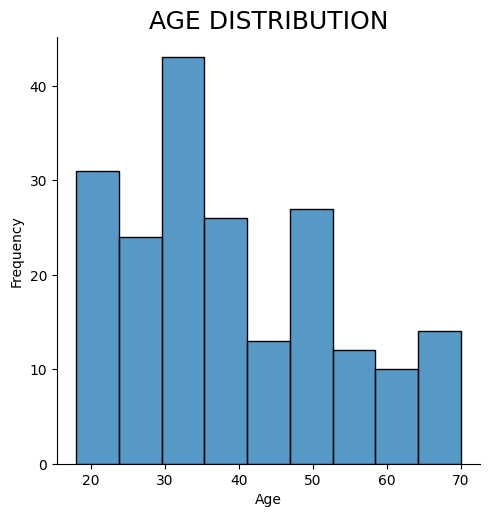

In [20]:
seaborn.displot(data['Age'])
plt.title('AGE DISTRIBUTION', fontsize  = 18)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

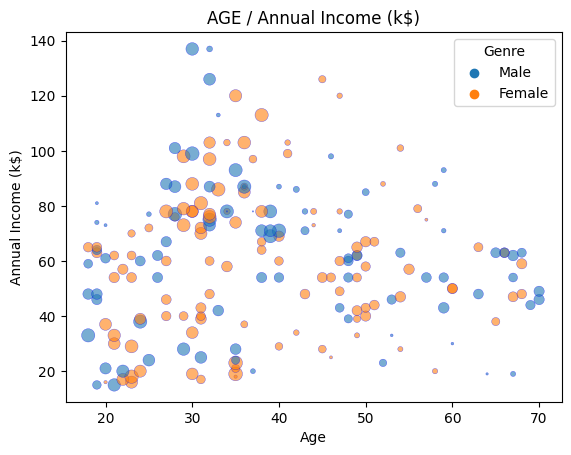

In [35]:
size = data['Spending Score (1-100)']  

seaborn.scatterplot(x='Age',y='Annual Income (k$)', data=data, hue='Genre',color = 'deepskyblue', s = size, alpha = 0.6,  edgecolor = 'b')
plt.title('AGE / Annual Income (k$)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

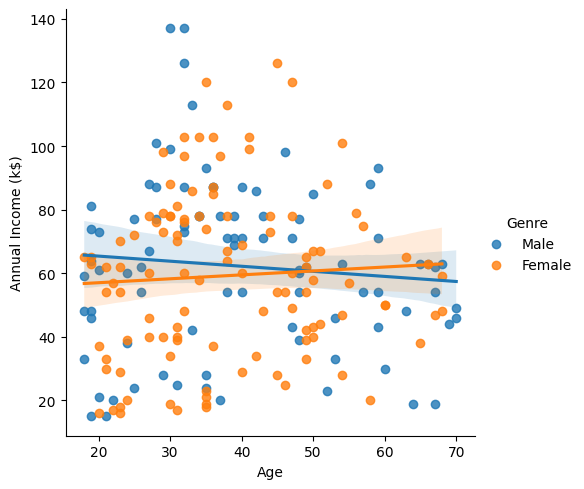

In [37]:
seaborn.lmplot(data=data, x='Age', y='Annual Income (k$)', hue='Genre')
plt.show()

In [42]:
data1 = data.copy()
data1['Genre'] = data['Genre'].map({'Male': 1, 'Female': 0})

In [79]:
X = data1.values
X = numpy.nan_to_num(X)

sc = StandardScaler()

# cluster_data = sc.fit_transform(X)
# print(colored('Cluster data samples : ', attrs = ['bold']), cluster_data[:5])
data1
print(X)

[[  1   1  19  15  39   1]
 [  2   1  21  15  81   1]
 [  3   0  20  16   6   1]
 ...
 [198   1  32 126  74   0]
 [199   1  32 137  18   0]
 [200   1  30 137  83   0]]


In [80]:
clusters = 3
model = KMeans(init='k-means++', n_clusters=clusters, n_init=10)

In [81]:
model.fit(X)
labels = model.labels_

In [82]:
data1['Clusters Labels'] = labels
data1

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters Labels
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,1
197,198,1,32,126,74,1
198,199,1,32,137,18,1


In [83]:
print(colored(data1.groupby('Clusters Labels').mean(), attrs=['bold']))

                 CustomerID     Genre        Age  Annual Income (k$)  \
Clusters Labels                                                        
0                      97.5  0.457143  42.814286           59.542857   
1                     166.5  0.455882  36.044118           88.911765   
2                      31.5  0.403226  37.451613           30.612903   

                 Spending Score (1-100)  
Clusters Labels                          
0                             50.514286  
1                             50.205882  
2                             49.838710  


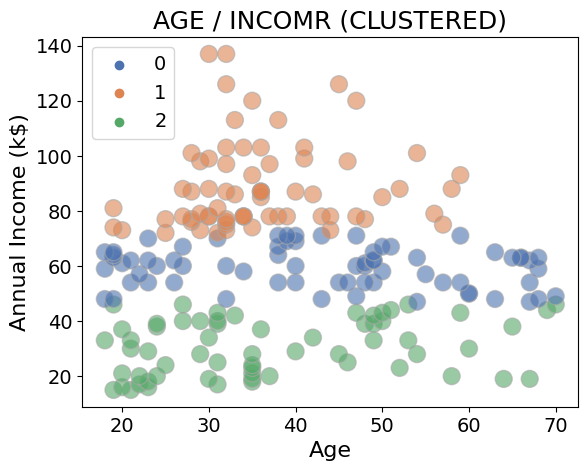

In [84]:
seaborn.scatterplot(x='Age', y='Annual Income (k$)', data = data1, s = 150, hue = 'Clusters Labels', palette = 'deep', alpha = 0.6, edgecolor = 'darkgrey')
plt.title('AGE / INCOMR (CLUSTERED)', fontsize = 18)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Annual Income (k$)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.show()

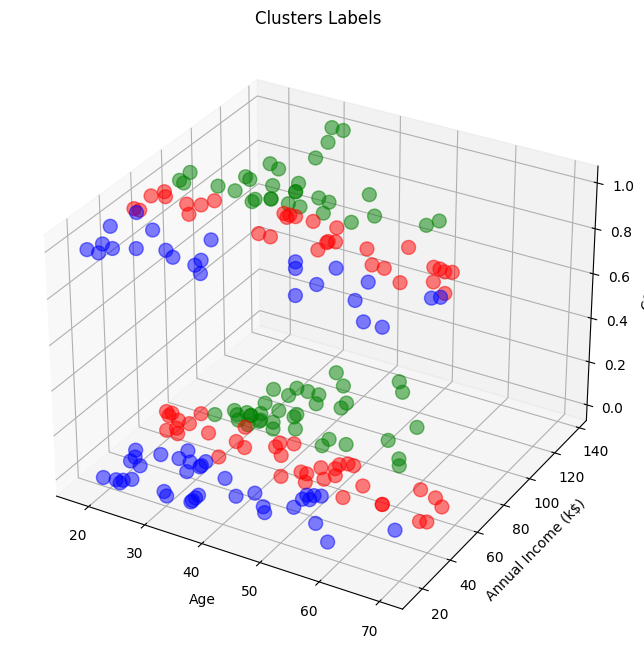

In [85]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Genre")
ax.set_title("Clusters Labels")

colors = ['r', 'g', 'b']

for i, c in enumerate(colors):
   clustered_data = data1[data1['Clusters Labels'] == i]
   ax.scatter(clustered_data['Age'], clustered_data['Annual Income (k$)'], clustered_data['Genre'], c=c, s=100, alpha=0.5)

plt.show()

